# Analyzing Tennessee Drug-Free School Zone Sentences

By [CJ Ciaramella](mailto:cj.ciaramella@gmail.com)

As part of an investigative reporting project, my colleague Lauren Krisai and I analyzed data regarding every inmate in the Tennessee prison system serving time for a drug-free school zone offense. Civil liberties and criminal justice groups have long claimed that such zones, which exist in all 50 states, extend far beyond schools, covering wide swaths of towns and resulting in a disproportionate number of charges against low-income and minority residents. The results of our investigation [were reported](http://reason.com/archives/2017/12/18/the-myth-of-the-playground-pus) on December 18, 2017 in *Reason Magazine*. Here are some of the findings of the analysis, documented below:

- Black offenders were significantly overrepresented among school zone sentences relative to their share of the total Tennessee population.

- Minorities received longer sentences on average than white offenders.

- While larger counties such as Knox and Davidson predicably returned larger numbers of school zone sentences than smaller, rural counties, several rural counties returned a high number relative to their small share of the state population. Maury county, for instance, has a population of only 28,000 but returned 58 sentences.

- There are 8,544 drug-free zones in Tennessee, of which 4,280 are childcare facilities.

## How we did it
First we import our Python libraries and the spreadsheet from the Tennessee Department of Corrections on all the current inmates serving time for drug-free school zone offenses.

In [3]:
#import libraries
import shapefile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

% matplotlib inline

# open excel spreadsheet and pass to variable
sentences = pd.read_excel("school-zone-violations.xlsx")

In [5]:
# peek at the DataFrame
sentences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 7 columns):
Last Name              434 non-null object
EXP Date               434 non-null object
Overall Sent           434 non-null object
Drug Sent              435 non-null float64
Offense Description    434 non-null object
County                 434 non-null object
Race                   434 non-null object
dtypes: float64(1), object(6)
memory usage: 23.9+ KB


In [6]:
sentences.head()

,Last Name,EXP Date,Overall Sent,Drug Sent,Offense Description,County,Race
0,CORRIGAN,2026-10-23 00:00:00,14,14.0,SCHEDULE II DRUGS: DRG ZN,ANDERSON,WHITE
1,IRBY,2016-03-10 00:00:00,2,2.0,SCHEDULE VI DRUGS: DRG ZN,ANDERSON,BLACK
2,CRUTCHER,2026-03-22 00:00:00,18,15.0,SCHEDULE I DRUGS: DRG ZN,BEDFORD,BLACK
3,CLANTON,2037-08-20 00:00:00,23.5,23.5,"DRUGS: MFG, SALE, POSS. DRG ZN",BEDFORD,WHITE
4,MCMAHAN,2039-03-16 00:00:00,26,10.0,SCHEDULE II DRUGS: DRG ZN,BLOUNT,WHITE


## What are the demographics of the offender population?
Our spreadsheet has a column for race, which means we can find out the racial breakdown of who's getting sentenced to prison in Tennessee for drug-free school zone violations, and we can filter the spreadsheet to look at average sentence-length by race.

In [7]:
# find totals by race
sentences.Race.value_counts()

BLACK       300
WHITE       122
HISPANIC     12
Name: Race, dtype: int64

In [8]:
# filter by race and find average drug sentences
blacks = sentences[sentences.Race == "BLACK"]
whites = sentences[sentences.Race == "WHITE"]
hispanics = sentences[sentences.Race == "HISPANIC"]

In [9]:
whites['Drug Sent'].mean()

8.077868852459016

In [10]:
blacks['Drug Sent'].mean()

11.65

In [11]:
hispanics['Drug Sent'].mean()

15.0

## Let's make a bar chart showing the racial breakdown
One of the chief criticisms of drug-free school zone laws is that they are disproportionately used against minorities. Is it true in Tennessee? Let's see what the state demographics look like next to the demographics of the inmate population serving time for drug-free school zone offenses.

*Note: the demographic numbers used to build this chart were obtained from the lastest U.S. Census data on Tennessee and statistics of the school zone offender population derived from numbers returned in the previous section of this notebook.*

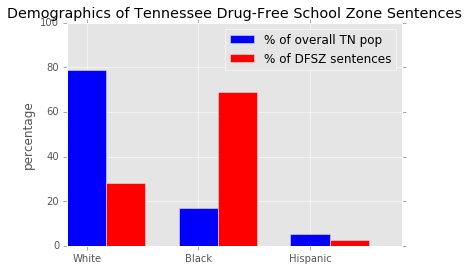

In [12]:
# bar graph of demographics of TN drug-free school zone sentences
N = 3
demo = (78.7, 17.1, 5.2) # percentage of white, black, hispanic TN pop
sentencing_demo = (28, 69, 2.7) # percentage of white, black, hispanic DFSZ offenders

ind = np.arange(N)  # x locations for the groups
width = 0.35        # width of the bars

fig, ax = plt.subplots()
# bars
rects1 = ax.bar(ind, demo, width, color='b')
rects2 = ax.bar(ind + width, sentencing_demo, width, color='r')

# labels, title and axes ticks
ax.set_ylabel('percentage')
ax.set_ylim([0, 100])
ax.set_title('Demographics of Tennessee Drug-Free School Zone Sentences')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('White', 'Black', 'Hispanic'))
# legend
ax.legend((rects1[0], rects2[0]), ('% of overall TN pop', '% of DFSZ sentences'))

plt.show()

## Which counties are returning the most drug-free zone sentences?
Python also lets us group sentences by county. Unsuprisingly, two of the most populous counties in Tennessee—Knox and Davidson—return the most drug-free school zone sentences, but two rural counties, Maury and Sullivan County, also returned very high numbers of sentences relative to their small share of the overall state population. Knox, Davidson, and Maury County also displayed large racial disparities in sentencing.

In [13]:
# group by county and number of sentences by race
bycounty = sentences.groupby(['County']).Race.value_counts().reset_index()

In [14]:
bycounty

,County,Race,0
0,ANDERSON,BLACK,1
1,ANDERSON,WHITE,1
2,BEDFORD,BLACK,1
3,BEDFORD,WHITE,1
4,BLOUNT,BLACK,5
5,BLOUNT,WHITE,3
6,BLOUNT,HISPANIC,1
7,BRADLEY,BLACK,4
8,BRADLEY,WHITE,1
9,CLAY,WHITE,1


In [15]:
# export csv of groupby county
bycounty.to_csv('by-county.csv')

## What were the most common charges?
Although the charges in the spreadsheet are not uniformly written, we can see by sorting them that Schedule II drugs, especially cocaine, make up the bulk of prosecutions under drug-free school zone laws in Tennessee.

In [78]:
# sort by most common charges
sentences['Offense Description'].value_counts().reset_index()

,index,Offense Description
0,SCHEDULE II DRUGS: DRG ZN,100
1,SCHEDULE II DRUGS: COCAINE <1/2 GRAM DRG ZN,99
2,SCHEDULE II DRUGS: COCAINE DRG ZN,80
3,SCHEDULE VI DRUGS: DRG ZN,23
4,"DRUGS: MFG, SALE, POSS. DRG ZN",16
5,"SCHED II DRUGS: METH $100,000 FINE DRG ZN",15
6,SCHEDULE III DRUGS: DRG ZN,14
7,SCHEDULE I DRUGS: DRG ZN,14
8,SCHEDULE II DRUGS: ATT. DRG ZN,13
9,SCHEDULE II DRUGS: CONSP. DRG ZN,12


## How many drug-free zones are there in Tennessee?
Through a public records request, *Reason* obtained GIS shapefiles that the Tennessee state government used to create a map of all the drug-free school zones in the state. In addition to allowing us to create our own maps, the files let us see exactly how many drug-free zones exist in the state, the location names, and if they are schools, parks, libraries, or childcare facilities.

In [24]:
# read shapefile data and find number of zones
sf = shapefile.Reader("zones_shapefile/zones")
shapes = sf.shapes()
len(shapes)

8544

In [76]:
# Look at the shapefile attribute fields
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['NAME', 'C', 254, 0],
 ['TYPE', 'C', 254, 0],
 ['LOCATIONLA', 'C', 50, 0],
 ['NAMELASTUP', 'C', 50, 0],
 ['DISTRICT', 'N', 5, 0],
 ['BOPP_ID', 'C', 100, 0],
 ['Shape_STAr', 'F', 19, 11],
 ['Shape_STLe', 'F', 19, 11]]

In [75]:
# convert shapefile records to DataFrame
records = sf.records()
df_records = pd.DataFrame(records)
df_records.head()

,0,1,2,3,4,5,6,7
0,DAVIDSON ACADEMY AND PRESCHOOL (-E-),CHILDCARE,,,4,C_1,2.668386e+06,7721.079961
1,NORTHWEST FAMILY YMCA PRE-SCHOOL,CHILDCARE,point,,4,C_1001,4.743764e+05,3418.322974
2,YMCA @ CUMBERLAND SCHOOL,CHILDCARE,,,4,C_1004,4.534931e+05,2897.791315
3,YMCA @ SHWAB,CHILDCARE,,,4,C_1006,4.526802e+05,3633.890042
4,YMCA @ PARAGON MILLS SCHOOL,CHILDCARE,,,4,C_1009,3.437124e+05,2307.612341


In [74]:
# break it down by category
df_records[1].value_counts()

CHILDCARE    4280
SCHOOL       2707
PARK         1254
LIBRARY       302
                1
Name: 1, dtype: int64